In [9]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt 
import time
from lightweight_charts import Chart
from tradingview_ta import TA_Handler,Exchange,Interval
import time 
import seaborn as sns
import talib as ta
from datetime import datetime, timedelta
from nselib import capital_market

In [10]:
class em:
    def __init__(self,symbol):
        self.symbol=symbol
        #self.data=None
    def symb(self):
        current_date = datetime.now().date()
        seven_days_ago = current_date - timedelta(days=7)
        try:
            msft=yf.download(f"{self.symbol}.NS",interval='5m',start=seven_days_ago)
            data_save=msft.to_parquet(f'data/{self.symbol}.parquet')
            self.data=pd.read_parquet(f'data/{self.symbol}.parquet')
        #return(self.data)
        except Exception as e:
            print(f'{self.symbol}==>{e}')
    def ind(self):
        if self.data is not None:  # Check if data is available
            a = self.data
            a['EMA_5'] = a['Close'].rolling(5).mean()
            a['EMA_15'] = a['Close'].rolling(15).mean()
            #return self.data
        else:
            print("Data not available. Run symb method first.")
            #return None
    def pnl(self):
        dfc=self.data
        dfc['long_entry']=dfc.EMA_15>dfc.EMA_5
        dfc['long_exit']=dfc.EMA_15<=dfc.EMA_5
        dfc['positions_long']=np.nan
        dfc.loc[dfc.long_entry,'positions_long']=1
        dfc.loc[dfc.long_exit,'positions_long']=0
        dfc.positions_long=dfc.positions_long.fillna(method='ffill')
        dfc['prices_difference']=dfc.Close-dfc.Close.shift(1)
        dfc['pnl']=dfc.positions_long.shift(1)*dfc.prices_difference
        dfc['cumpnl']=dfc.pnl.cumsum()
        b=dfc['cumpnl'].sum()
        return(b)

In [11]:
obj=em("INFY")
obj.symb()
obj.ind()
obj.pnl()


[*********************100%%**********************]  1 of 1 completed


1203.432861328125

In [12]:
data=capital_market.equity_list()

In [13]:
symbols=data['SYMBOL']

In [14]:
l=len(symbols)

In [15]:
symbols[:5]

0     20MICRONS
1    21STCENMGM
2        360ONE
3     3IINFOLTD
4       3MINDIA
Name: SYMBOL, dtype: object

In [16]:
Pnl={}

In [17]:
for i in range(0,l):
    obj=em(symbols[i])
    obj.symb()
    obj.ind()
    pnl=obj.pnl()
    Pnl[symbols[i]]=pnl
    print(i,f'{symbols[i]}')

[*********************100%%**********************]  1 of 1 completed
0 20MICRONS
[*********************100%%**********************]  1 of 1 completed
1 21STCENMGM
[*********************100%%**********************]  1 of 1 completed
2 360ONE
[*********************100%%**********************]  1 of 1 completed
3 3IINFOLTD
[*********************100%%**********************]  1 of 1 completed
4 3MINDIA
[*********************100%%**********************]  1 of 1 completed
5 3PLAND
[*********************100%%**********************]  1 of 1 completed
6 5PAISA
[*********************100%%**********************]  1 of 1 completed
7 63MOONS
[*********************100%%**********************]  1 of 1 completed
8 A2ZINFRA
[*********************100%%**********************]  1 of 1 completed
9 AAATECH
[*********************100%%**********************]  1 of 1 completed
10 AAKASH
[*********************100%%**********************]  1 of 1 completed
11 AAREYDRUGS
[*********************100%%****************


1 Failed download:
['KALYANI.NS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



899 KALYANI
[*********************100%%**********************]  1 of 1 completed
900 KALYANIFRG
[*********************100%%**********************]  1 of 1 completed
901 KALYANKJIL
[*********************100%%**********************]  1 of 1 completed
902 KAMATHOTEL
[*********************100%%**********************]  1 of 1 completed
903 KAMDHENU
[*********************100%%**********************]  1 of 1 completed
904 KAMOPAINTS
[*********************100%%**********************]  1 of 1 completed
905 KANANIIND
[*********************100%%**********************]  1 of 1 completed
906 KANORICHEM
[*********************100%%**********************]  1 of 1 completed
907 KANPRPLA
[*********************100%%**********************]  1 of 1 completed
908 KANSAINER
[*********************100%%**********************]  1 of 1 completed
909 KAPSTON
[*********************100%%**********************]  1 of 1 completed
910 KARMAENG
[*********************100%%**********************]  1 of 1 completed
911 K


1 Failed download:
['NIRAJISPAT.NS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



1208 NIRAJISPAT
[*********************100%%**********************]  1 of 1 completed
1209 NITCO
[*********************100%%**********************]  1 of 1 completed
1210 NITINSPIN
[*********************100%%**********************]  1 of 1 completed
1211 NITIRAJ
[*********************100%%**********************]  1 of 1 completed
1212 NKIND
[*********************100%%**********************]  1 of 1 completed
1213 NLCINDIA
[*********************100%%**********************]  1 of 1 completed
1214 NMDC
[*********************100%%**********************]  1 of 1 completed
1215 NOCIL
[*********************100%%**********************]  1 of 1 completed
1216 NOIDATOLL
[*********************100%%**********************]  1 of 1 completed
1217 NORBTEAEXP
[*********************100%%**********************]  1 of 1 completed
1218 NOVAAGRI
[*********************100%%**********************]  1 of 1 completed
1219 NRAIL
[*********************100%%**********************]  1 of 1 completed
1220 NRBBEARIN

In [28]:
Pnl

{'20MICRONS': 1261.9542083740234,
 '21STCENMGM': 0.0,
 '360ONE': 378.75054931640625,
 '3IINFOLTD': -52.10222244262695,
 '3MINDIA': 266764.107421875,
 '3PLAND': 2080.501350402832,
 '5PAISA': 3455.9124755859375,
 '63MOONS': 1688.3039855957031,
 'A2ZINFRA': 28.49998664855957,
 'AAATECH': 2814.895965576172,
 'AAKASH': -3.599996566772461,
 'AAREYDRUGS': 1552.7511444091797,
 'AARON': 2876.5980834960938,
 'AARTECH': 4916.048080444336,
 'AARTIDRUGS': 2251.0993041992188,
 'AARTIIND': 1158.8572998046875,
 'AARTIPHARM': 1725.2193603515625,
 'AARTISURF': 6874.426208496094,
 'AARVEEDEN': -28.899734497070312,
 'AARVI': 574.4002227783203,
 'AAVAS': 1442.4169921875,
 'ABAN': 2193.499069213867,
 'ABB': -393.6484375,
 'ABBOTINDIA': -35782.111328125,
 'ABCAPITAL': 473.6475524902344,
 'ABFRL': 526.1518249511719,
 'ABMINTLLTD': 765.4002571105957,
 'ABSLAMC': 1292.5014953613281,
 'ACC': 13326.231689453125,
 'ACCELYA': -3016.3883056640625,
 'ACCURACY': -4.5,
 'ACE': -762.5810546875,
 'ACEINTEG': 333.00057601

In [19]:
transformed_data = {'Symbols': list(Pnl.keys()), 'pnl': list(Pnl.values())}
df=pd.DataFrame(transformed_data)

In [20]:
df

,Symbols,pnl
0,20MICRONS,1261.954208
1,21STCENMGM,0.000000
2,360ONE,378.750549
3,3IINFOLTD,-52.102222
4,3MINDIA,266764.107422
...,...,...
1938,ZOTA,5649.149475
1939,ZUARI,2084.802338
1940,ZUARIIND,708.144653
1941,ZYDUSLIFE,726.222839


In [21]:
df['pnl'].sum()

6183755.406686962

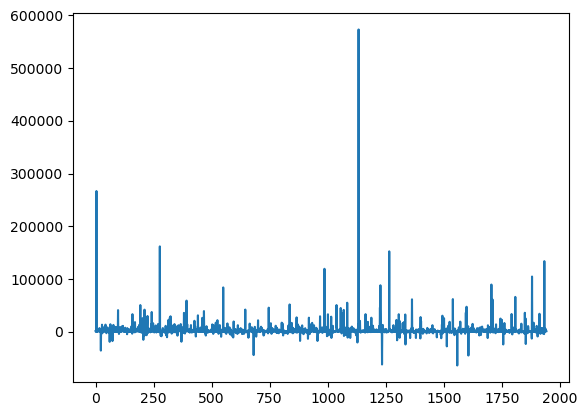

In [22]:
plt.plot(df['pnl'])

In [23]:
df['pnl'].max()

573121.25

In [24]:
df['pnl'].min()

-64016.361328125

In [43]:
loss=df[df['pnl']<0].sum()
loss

Symbols    3IINFOLTDAAKASHAARVEEDENABBABBOTINDIAACCELYAAC...
pnl                                          -1336117.520224
dtype: object

In [42]:
profit=df[df['pnl']>=0].sum()
profit

Symbols    20MICRONS21STCENMGM360ONE3MINDIA3PLAND5PAISA63...
pnl                                           7519872.926911
dtype: object